In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
!pip install colorama
!pip install pycm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.6/597.6 kB 52.9 MB/s eta 0:00:00


# Objective Function

### FitnessFunction

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm

from sklearn.preprocessing import Binarizer
from sklearn import metrics

from numpy.linalg import norm
from xgboost import XGBClassifier

class fitnessFUNs:
		#____________________________________________________________________________________       
		def FN1(I,trainInput,trainOutput,dim):            
			data_train_internal, data_test_internal, target_train_internal, target_test_internal = train_test_split(trainInput, trainOutput, test_size=0.34, random_state=1)
			reducedfeatures=[]
			for index in range(0,dim):
				if (I[index]==1):
						reducedfeatures.append(index)

			reduced_data_train_internal=data_train_internal[:,reducedfeatures]
			reduced_data_test_internal=data_test_internal[:,reducedfeatures]
			
			
			clf = XGBClassifier()
			clf.fit(reduced_data_train_internal, target_train_internal)
			target_pred_internal = clf.predict(reduced_data_test_internal)
			acc_train = float(accuracy_score(target_test_internal, target_pred_internal))


			fitness=0.99*(1-acc_train)+0.01*sum(I)/(dim)

			return fitness
		#_____________________________________________________________________       
		def getFunctionDetails(a):
				
				# [name, lb, ub, dim]
				param = {  0:["FN1",-1,1]

								}
				return param.get(a, "nothing")

# Solution

In [2]:
class solution:
    def __init__(self):
        self.best = 0
        self.bestIndividual=[]
        self.convergence1 = []
        self.convergence2 = []
        self.optimizer=""
        self.objfname=""
        self.startTime=0
        self.endTime=0
        self.executionTime=0
        self.lb=0
        self.ub=0
        self.dim=0
        self.popnum=0
        self.maxiers=0
        self.trainAcc=None
        self.testAcc=None
        


# transfer_functions_benchmark

In [150]:
#import skfuzzy
import numpy as np
from math import pi
from scipy.special import erf
import matplotlib.pylab as plt


class transfer_functions_benchmark:
    

    def s1(x):
                
        return x


# Optimizers

## MuARO
Artificial Rabbits Optimization

the code is here: https://www.mathworks.com/matlabcentral/fileexchange/110250-artificial-rabbits-optimization-aro?s_tid=FX_rc3_behav

In [151]:
class Root:
    """ This is root of all Algorithms """

    ID_MIN_PROB = 0  # min problem
    ID_MAX_PROB = -1  # max problem

    ID_POS = 0  # Position
    ID_FIT = 1  # Fitness

    EPSILON = 10E-10    # Avoid division by 0 

    DEFAULT_LB = -1
    DEFAULT_UB = 1

    def __init__(self, obj_func=None, lb=list, ub=list, verbose=True):
        self.verbose = verbose
        self.obj_func = obj_func
        if lb is None:
            print("Lower bound need to be a list.")
            exit(0)
        else:
            self.lb = array(lb)
        if ub is None:
            print("Upper bound need to be a list.")
            exit(0)
        else:
            self.ub = array(ub)
           
        if len(lb) != len(ub):
            print("Lower bound and Upper bound need to have the same length")
            exit(0)
        
        self.problem_size = len(lb)
        self.solution, self.loss_train, self.fs_counts = None, [], []

    def create_solution(self, minmax=0):
        """ Return solution with 2 element: position of solution and fitness of solution
        Parameters
        ----------
        minmax
            0 - minimum problem, else - maximum problem
        """
        position = uniform(self.lb, self.ub)
        fitness, binary_pos = self.get_fitness_position(position=position, minmax=minmax)
        return [position, fitness, binary_pos]

    def get_fitness_position(self,position=None, minmax=0):
        """     Assumption that objective function always return the original value
        :param position: 1-D numpy array
        :param minmax: 0- min problem, 1 - max problem
        :return:
        """
        Positions=position;
         
        
        for j in range(0,self.dim):
          ss= transfer_functions_benchmark.s1(position[j])
          if (random.random()<ss): 
              Positions[j]=1;
          else:
              Positions[j]=0;

        return self.obj_func(Positions,self.trainInput,self.trainOutput,self.dim) if minmax == 0 else 1.0 / (self.obj_func(Positions,self.trainInput,self.trainOutput,self.dim) + self.EPSILON), Positions     # Avoid division by 0

    def get_fitness_solution(self,solution=None, minmax=0):
        return self.get_fitness_position(solution[self.ID_POS],self.trainInput,self.trainOutput,self.dim, minmax)

    def get_global_best_global_worst_solution(self, pop=None, id_fit=None, id_best=None):
        sorted_pop = sorted(pop, key=lambda temp: temp[id_fit])
        if id_best == self.ID_MIN_PROB:
            return deepcopy(sorted_pop[id_best]), deepcopy(sorted_pop[self.ID_MAX_PROB])
        elif id_best == self.ID_MAX_PROB:
            return deepcopy(sorted_pop[id_best]), deepcopy(sorted_pop[self.ID_MIN_PROB])


    def update_global_best_global_worst_solution(self, pop=None, id_best=None, id_worst=None, g_best=None):
        """ Sort the copy of population and update the current best position. Return the new current best position """
        sorted_pop = sorted(pop, key=lambda temp: temp[self.ID_FIT])
        current_best = sorted_pop[id_best]
        g_best = deepcopy(current_best) if current_best[self.ID_FIT] < g_best[self.ID_FIT] else deepcopy(g_best)
        return g_best, sorted_pop[id_worst]


    def amend_position(self, position=None):
        return clip(position, self.lb, self.ub)

    def amend_position_random(self, position=None):
        return where(logical_and(self.lb <= position, position <= self.ub), position, uniform(self.lb, self.ub))


In [154]:
from numpy.random import normal, rand, choice
from numpy import mean, pi, sin, cos, array
from math import gamma
# from mealpy.optimizer import Root
from copy import deepcopy
from torch import randperm

class MuAROClass(Root):
  
    def __init__(self, obj_func=None, lb=list, ub=list, verbose=True, epoch=1000, pop_size=100, L=0.08, LH=10000,trainInput=None,trainOutput=None,dim=None, logger=None):  
            """
            Args:
                problem (dict): The problem dictionary
                epoch (int): maximum number of iterations, default = 10000
                pop_size (int): number of population size, default = 100
                pb (float): breeding probability, default = 0.75
                pm (float): probability of mutation, default = 0.01
            """
            super().__init__(obj_func,lb, ub, verbose)
            self.epoch = epoch
            self.pop_size = pop_size
            self.nfe_per_epoch = self.pop_size
            self.sort_flag = True
            self.size_b = int(self.pop_size / 5)
            self.lb=lb
            self.ub=ub
            self.objf=obj_func

            self.pb = 0.75#self.validator.check_float("pb", pb, (0, 1.0))
            self.pm = 0.01#self.validator.check_float("pm", pm, (0, 1.0))

            self.trainInput=trainInput
            self.dim=dim
            self.trainOutput=trainOutput
            self.logger = logger

    def _crossover_random(self, pop, g_best):
        start_point = np.random.randint(0, self.dim / 2)
        id1 = start_point
        id2 = int(start_point + self.dim / 3)
        id3 = int(self.dim)

        partner = pop[np.random.randint(0, self.pop_size)][self.ID_POS]
        new_temp = deepcopy(g_best[self.ID_POS])
        new_temp[0:id1] = g_best[self.ID_POS][0:id1]
        new_temp[id1:id2] = partner[id1:id2]
        new_temp[id2:id3] = g_best[self.ID_POS][id2:id3]
        return new_temp

    def get_levy_flight_step(self, beta=1.0, multiplier=0.001, case=0):
        # u and v are two random variables which follow np.random.normal distribution
        # sigma_u : standard deviation of u
        sigma_u = np.power(gamma(1 + beta) * np.sin(np.pi * beta / 2) / (gamma((1 + beta) / 2) * beta * np.power(2, (beta - 1) / 2)), 1 / beta)
        # sigma_v : standard deviation of v
        sigma_v = 1
        u = np.random.normal(0, sigma_u ** 2)
        v = np.random.normal(0, sigma_v ** 2)
        s = u / np.power(abs(v), 1 / beta)
        if case == 0:
            step = multiplier * s * np.random.uniform()
        elif case == 1:
            step = multiplier * s * np.random.normal(0, 1)
        else:
            step = multiplier * s
        return step

    def train(self):
    
        pop_new = []
        #Initialize population with random positions
        pop = [self.create_solution() for _ in range(self.pop_size)]
        # #assign fitness to fprey.
        g_best, g_worst = self.get_global_best_global_worst_solution(pop, self.ID_FIT, self.ID_MIN_PROB)

        Sol=numpy.random.randint(2, size=(self.pop_size,self.dim))     #generating binary individuals
        pop_pos=numpy.zeros((self.pop_size,self.dim))  # Population size, dim
        pop_pos=numpy.copy(Sol)
        #Evaluate initial random solutions
        pop_fit=numpy.zeros(self.pop_size)
        
        for i in range(0,self.pop_size):    
            pop_fit[i]=self.objf(pop_pos[i,:],self.trainInput,self.trainOutput,self.dim) #fitness
        
        best_f = float('inf')
        best_x = []
        for i in range(self.pop_size):
            if pop_fit[i] <= best_f:
                best_f = pop_fit[i]
                best_x = pop_pos[i, :]

        his_best_fit = np.zeros(self.epoch)

        for epoch in range(self.epoch):
            
            Direct1 = np.zeros((self.pop_size, self.dim))
            Direct2 = np.zeros((self.pop_size, self.dim))
            theta=2*(1-epoch/self.epoch)

            pos_new = []
            for i in range(0, self.pop_size):
                L=(np.exp(1)-np.exp(((epoch-1)/self.epoch)**2))*(np.sin(2*np.pi*np.random.rand())) #Eq.(3)
                rd=np.ceil(np.random.rand()*(self.dim))
                Direct1[i,np.random.randint(self.dim, size=int(rd))]=1
                c=Direct1[i,:]#Eq.(4)            
                # R=L*c 
                R = np.multiply(L,c)#Eq.(2)
                A = 2 * np.log(1 / np.random.rand()) * theta #Eq.(15)           
                ## Exploration
                A=0
                if A>1:
                    K = np.array([np.arange(1,i - 1+1),np.arange(i + 1,self.pop_size+1)])
                    # RandInd = K(np.random.randint(np.array([1,self.pop_size - 1])))
                    RandInd = np.random.randint(np.array([1,self.pop_size - 1]))[1]
                    pos_new = pop_pos[RandInd,:]+ np.multiply(R,(pop_pos[i,:] - pop_pos[RandInd,:]))++ np.round(0.5 * (0.05 + np.random.rand())) * np.random.randn()#Eq.(1)

                ## Exploitation
                else:
                    if np.random.uniform() < 0.5:
                        rd2=np.abs(np.ceil(np.random.randn() * self.dim))
                        Direct2[i,np.random.randint(self.dim, size=int(rd2))]=1
                        gr = Direct2[i,:]
                        H = ((self.epoch - epoch + 1) / self.epoch) * np.random.randn()
                        b = pop_pos[i,:] + np.multiply(H * gr,pop_pos[i,:])
                        pos_new = pop_pos[i,:] + np.multiply(R,(np.random.randn() * b - pop_pos[i,:]))
                    else:
                        pos_new = self._crossover_random(pop, g_best)
                        # Mutation
                        temp = np.random.uniform(self.lb, self.ub)
                        pos_new = np.where(np.random.uniform(0, 1, self.dim) < self.pm, temp, pos_new)
                # pos_new = self.amend_position(pos_new, self.lb, self.ub)
                # pop_new.append([pos_new, None])
                
                fit_new, pos_new_binary = self.get_fitness_position(pos_new)
                if fit_new < pop[i][self.ID_FIT]:
                    pop[i] = [pos_new, fit_new, pos_new_binary]

            
            for i in range(self.pop_size):
                if pop[i][self.ID_FIT] < fit_new:
                    fit_new = pop[i][self.ID_FIT]
                    pos_new = pop[i][self.ID_POS]
                pop[i] = [pos_new, fit_new, pos_new_binary]            

            his_best_fit[epoch] = fit_new          

            g_best, g_worst = self.update_global_best_global_worst_solution(pop, self.ID_MIN_PROB, self.ID_MAX_PROB, g_best)
            
            for i in range(self.pop_size):
                pop_pos[i, :]=g_best[self.ID_POS]
                pop_fit[i]=g_best[self.ID_FIT]

            self.loss_train.append(g_best[self.ID_FIT])
            self.fs_counts.append(sum(g_best[self.ID_POS]))
                
            if (epoch%1==0):
                
                print(['At iteration'+ str(epoch+1)+' the best fitness on trainig is:'+ str(g_best[self.ID_FIT])+', the best number of features: '+str(sum(g_best[self.ID_POS]))])
                self.logger.info(['At iteration'+ str(epoch+1)+' the best fitness on trainig is:'+ str(g_best[self.ID_FIT])+', the best number of features: '+str(sum(g_best[self.ID_POS]))])
        
        self.solution = g_best
        return g_best[self.ID_POS], g_best[self.ID_FIT], self.loss_train, self.fs_counts

In [162]:
import random
import numpy
import math
import time
from numpy.random import uniform, normal, rand

    
class muaro:

      def MuARO(objf,lb,ub,dim,SearchAgents_no,Max_iter,trainInput,trainOutput,LOGGER_FILE):
    

            lb=0
            # initialize alpha, beta, and delta_pos
            g_best=numpy.zeros(dim)
            Alpha_score=float("inf")
            XXX=1
            verbose = True
            # Loop counter
            print("MuARO is optimizing  \""+objf.__name__+"\"")   
            LOGGER_FILE.info("MuARO is optimizing  \""+objf.__name__+"\"")  
            s=solution()
            timerStart=time.time() 
            s.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
            lb = [lb] * dim
            ub = [ub] * dim

            best_pos1, best_fit1, list_loss1, fs_counts = MuAROClass(objf, lb, ub, verbose, Max_iter, SearchAgents_no,0.08, 10000,
            
            timerEnd=time.time()  
            s.endTime=time.strftime("%Y-%m-%d-%H-%M-%S")
            s.executionTime=timerEnd-timerStart
            s.bestIndividual=best_pos1
            s.convergence1=list_loss1
            s.convergence2=fs_counts
            

            s.optimizer="MuARO"
            s.objfname=objf.__name__
            
            return s

# Selector

In [163]:
# -*- coding: utf-8 -*-
from __future__ import division
from __future__ import print_function

import logging
import logging.config
import os, sys
from datetime import datetime

def getLogger(folder, File_name, mode = 'root'):
    LOGFINENAME = '{0}.log'.format(File_name)
    LOGFILE = os.path.join(folder, LOGFINENAME)

    DEFAULT_LOGGING = {
        'version': 1,
        'formatters': {
            'deep_info': {
                'format': '%(asctime)s %(module)s(%(lineno)d) - %(levelname)s: %(message)s',
                'datefmt': '%Y-%m-%d %H:%M:%S',
            },
            'standard': {
                'format': '%(asctime)s %(levelname)s(%(lineno)d): %(message)s',
                'datefmt': '%Y-%m-%d %H:%M:%S',
            },
            'simple': {
                'format': '%(message)s',
            },
        },
        
        'handlers': {
            'console': {
                'class': 'logging.StreamHandler',
                'formatter': 'standard',
                'level': 'INFO',
                'stream': sys.stdout,
            },
            'file': {
                'class': 'logging.FileHandler',
                'formatter': 'deep_info', #simple
                'level': 'INFO',
                'filename': LOGFILE,
                'mode': 'w',  #overwrite
            },
        },
        
        'loggers': {
            'print_all': {
                'level': 'INFO',
                'handlers': ['console', 'file'],
                'propagate': False,
            },
            'root': {
                'level': 'INFO',
                'handlers': ['file'],
                'propagate': False,
            },
            __name__: {
                'level': 'INFO',
                'handlers': ['console', 'file'],
                'propagate': False,
            },
        }
    }
    
    logging.config.dictConfig(DEFAULT_LOGGING)
    logger_console = logging.getLogger(mode)
    logger_file = logging.getLogger('root')

    return logger_console, logger_file

# Cross Validation

In [168]:
# -*- coding: utf-8 -*-
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
import time
from keras.models import Sequential
from keras.layers import Dense
from xgboost import XGBClassifier
import numpy as np
from keras.layers import Dense, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D, Dropout
from keras.optimizers import Adam
import xgboost as xgb
from sklearn.metrics import cohen_kappa_score

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
import sys, os
from sklearn.pipeline import make_pipeline
import csv
import numpy
import numpy as np
import time
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# import utils.fitnessFUNs as fitnessFUNs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn import svm
from pycm import *
import seaborn as sns

from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import LeaveOneOut



def export_conf_mat(normalized_data, labels, exp_path, algo, flag = None):


    colormap = sns.color_palette("Blues", as_cmap=True)
    plt.tight_layout()
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 20

    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(np.around(normalized_data, decimals=3), 
                cmap=colormap, #
                annot=True, 
                square=True,
                cbar=False,
                # annot_kws={'size':10},
                fmt='g',
                xticklabels=list(labels), 
                yticklabels=list(labels))


    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')

    save_path = os.path.join(exp_path, flag + "_best_individual_conf_mat_"+ algo + ".pdf")
    fig.savefig(save_path, bbox_inches='tight', dpi=400)

def plot_roc_curve(clf, X_test, Y_test, labels, img_name = 'curve'):
    
    pred_prob = clf.predict_proba(X_test)

    # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = {}

    n_class = len(set(Y_test))
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i) 
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        
    # roc for each class
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    for i in range(n_class):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], str(labels[i])))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.savefig(img_name,dpi=300);  
    
    


class slctrCrossVal:

    def selector(algo,func_details,popSize,Iter,completeData_train, completeData_test,samples_ratio, path_f, exp_folder, LOGGER_FILE, class_ = 'multiclass', CVtype = 'CV'):
        function_name=func_details[0]
        lb=func_details[1]
        ub=func_details[2]
        use_predifined_best_indiv = False
      
        
        DatasetSplitRatio=0.15   #Training 66%, Testing 34%
        
        DataFile_train=path_f+completeData_train
        DataFile_test=path_f+completeData_test
          
        data_set_train=numpy.loadtxt(open(DataFile_train,"rb"),delimiter=",",skiprows=0)
        data_set_test=numpy.loadtxt(open(DataFile_test,"rb"),delimiter=",",skiprows=0)
        
        LOGGER_FILE.info(f'Loaded Train shape {data_set_train.shape} - Test shape {data_set_test.shape}')
        
        
        numRowsData_train=numpy.shape(data_set_train)[0]    # number of instances in the  dataset
        numFeaturesData_train=numpy.shape(data_set_train)[1]-1 #number of features in the  dataset

        numRowsData_test=numpy.shape(data_set_test)[0]    # number of instances in the  dataset
        numFeaturesData_test=numpy.shape(data_set_test)[1]-1 #number of features in the  dataset
        
        trainInput=data_set_train[0:numRowsData_train,0:-1]
        testInput=data_set_test[0:numRowsData_test,0:-1]


        s= StandardScaler()
        #apply to training, test 
        trainInput = s.fit_transform(trainInput)
        testInput = s.transform(testInput)


        trainOutput=np.array(data_set_train[0:numRowsData_train,-1]).astype(int)
        testOutput=np.array(data_set_test[0:numRowsData_test,-1]).astype(int)


        if 'PH2' in completeData_train and class_ != 'binary':
          targets_names= ['Atypical-Nevus', 'Common-Nevus', 'Melanoma']
        elif 'ISIC_2016' in completeData_train and class_ == 'binary':
          targets_names= ['Benign', 'Malignant']
        elif 'HAM1000' in completeData_train and class_ != 'binary':
          targets_names= ['akiec', 'bcc','bkl', 'df','mel', 'nv','vasc']


        print(targets_names)
        

    
        if numFeaturesData_train != numFeaturesData_test:
            print('Mismatch in number of feature of Train {numFeaturesData_train} and Test {numFeaturesData_test}')
            sys.exit()   
        
    
        dim=numFeaturesData_train
        x = solution()
        
        if samples_ratio == None:

            trainInput_red = trainInput.copy()
            trainOutput_red = trainOutput.copy()


        else:

            df_train = pd.DataFrame(data_set_train)
            data = df_train.loc[df_train[df_train.columns[-1]].isin(set(df_train[df_train.columns[-1]].values))].groupby(df_train.columns[-1]).head(samples_ratio)
            trainInput_red = data.iloc[:,:-1].values
            trainOutput_red = np.array(data[df_train.columns[-1]].values).astype(int)
            
      
        if(algo==0):
          if use_predifined_best_indiv:
              x.bestIndividual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
          else:
              x=muaro.MuARO(getattr(fitnessFUNs, function_name),lb,ub,dim,popSize,Iter,trainInput_red,trainOutput_red,LOGGER_FILE)
          algo = 'MuARO'

      
                

        '''
        x.bestIndividual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1]
        '''

        reducedfeatures=[]
        for index in range(0,dim):
            if (x.bestIndividual[index]==1):
                reducedfeatures.append(index)
        reduced_data_train_global=trainInput[:,reducedfeatures]
        reduced_data_test_global=testInput[:,reducedfeatures]
        print(f'Reduced to {len(reducedfeatures)} features.')
        LOGGER_FILE.info(f'Reduced to {len(reducedfeatures)} features.')

        from xgboost import XGBClassifier

        knn = make_pipeline(StandardScaler(), XGBClassifier())
        
        knn.fit(reduced_data_train_global,trainOutput)

        # Compute the accuracy of the prediction
        target_pred_train = knn.predict(reduced_data_train_global)

        cm_train = ConfusionMatrix(actual_vector=trainOutput, predict_vector=target_pred_train)
        LOGGER_FILE.info('Train \n')
        LOGGER_FILE.info(cm_train)
        

        LOGGER_FILE.info(cm_train.print_matrix())
        LOGGER_FILE.info(cm_train.print_normalized_matrix())
        
        export_conf_mat(cm_train.to_array(normalized=False), targets_names, exp_folder, algo, flag = 'train')
        
        acc_train = float(accuracy_score(trainOutput, target_pred_train))
        x.trainAcc=acc_train
        
        rec_train = float(recall_score(trainOutput, target_pred_train, average='weighted'))
        x.rec_train=rec_train
        
        prec_train = float(precision_score(trainOutput, target_pred_train, average='weighted'))
        x.prec_train=prec_train
        
        f1_train = float(f1_score(trainOutput, target_pred_train, average='weighted'))
        x.f1_train=f1_train
        
        
        roc_auc_train = 0
        if class_ == "binary":
          try:
            roc_auc_train = float(roc_auc_score(trainOutput, target_pred_train, average='weighted'))
          except ValueError:
            roc_auc_train = 0
          
          
        x.roc_auc_train=roc_auc_train      
        
        target_pred_test = knn.predict(reduced_data_test_global)
        acc_test = float(accuracy_score(testOutput, target_pred_test))
        x.testAcc=acc_test

        cm_test = ConfusionMatrix(actual_vector=testOutput, predict_vector=target_pred_test)
        LOGGER_FILE.info('Test \n')
        LOGGER_FILE.info(cm_test.classes)
        LOGGER_FILE.info(cm_test)
        LOGGER_FILE.info(cm_test.print_matrix())
        LOGGER_FILE.info(cm_test.print_normalized_matrix())
        export_conf_mat(cm_test.to_array(normalized=False), targets_names, exp_folder, algo, flag = 'test')

        
        print(f'{knn.__class__.__name__}: test set accuracy: {(acc_test * 100)}')
        LOGGER_FILE.info(f'{knn.__class__.__name__}: test set accuracy: {(acc_test * 100)}')

        rec_test = float(recall_score(testOutput, target_pred_test, average='weighted'))
        x.rec_test=rec_test
        
        prec_test = float(precision_score(testOutput, target_pred_test, average='weighted'))
        x.prec_test=prec_test
        
        f1_test = float(f1_score(testOutput, target_pred_test, average='weighted'))
        x.f1_test=f1_test
        
        
        roc_auc_test = 0
        if class_ == "binary":
          try:
            plot_roc_curve(knn, reduced_data_test_global, testOutput, targets_names, img_name = exp_folder+'/roc_curve_'+str(algo)+'_end_'+str(x.endTime))
            roc_auc_test = float(roc_auc_score(testOutput, target_pred_test, average='weighted'))

          except:
            pass

        x.roc_auc_test=roc_auc_test
        
##########################################################################

       
        models = ['SVM']
        
        scores = [accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, cohen_kappa_score]
        results = []
        
        if CVtype == "kfold":
          skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        elif CVtype == "loo":
          skf = LeaveOneOut()
          
        print(reduced_data_train_global.shape, reduced_data_test_global.shape, trainOutput.shape, testOutput.shape)
        X = np.concatenate((reduced_data_train_global, reduced_data_test_global), axis=0)
        y = np.concatenate((trainOutput, testOutput), axis=0)
        
        if class_ != "binary":
          y_cat = to_categorical(y)
          
        print(X.shape, y.shape)

        
        for fold, (train_ids, test_ids) in enumerate(skf.split(X, y)):
          
          trainInput = np.array(X)[train_ids]
          testInput = np.array(X)[test_ids]
          trainOutput = np.array(y)[train_ids]
          testOutput = np.array(y)[test_ids]
          print(trainInput.shape, testInput.shape)
          
          
          if class_ != "binary":
            trainOutput_cat = np.array(y_cat)[train_ids]
            testOutput_cat = np.array(y_cat)[test_ids]
            
          for model_name in models:
              score_list = []
              start_time = time.time()


              if model_name == 'SVM':

                if class_ != 'binary':
                  clfSVM = svm.SVC(kernel='linear', C=1, random_state=42, decision_function_shape='ovr')
                else:
                  clfSVM = svm.SVC(kernel='linear', C=1, random_state=42)
                clfSVM.fit(trainInput, trainOutput)
                y_pred_prob = clfSVM.predict(testInput)
                
                if class_ == 'binary':
                  y_pred = (y_pred_prob > 0.5).astype(int)
                else: 
                  y_pred = y_pred_prob
                print(y_pred_prob[:5])
                  
              if model_name == 'XGBM':

                if class_ == 'binary':
                  params = {
                      'max_depth': 3,
                      'eta': 0.1,
                      'objective': 'binary:logistic',
                      'eval_metric': 'error',
                      'seed':42
                  }
                else:
                  params = {
                      'max_depth': 3,
                      'eta': 0.1,
                      'num_class': len(targets_names), # The number of classes that exist in this datset
                      #https://www.programcreek.com/python/?code=kubeflow%2Fxgboost-operator%2Fxgboost-operator-master%2Fconfig%2Fsamples%2Fxgboost-dist%2Flocal_test.py
                      'objective': 'multi:softmax', #
                      'eval_metric': 'merror',
                      'seed':42
                  }

                # Convert the data into DMatrix format
                dtrain = xgb.DMatrix(trainInput, label=trainOutput)
                dtest = xgb.DMatrix(testInput)
                num_rounds = 10
                model_xgbm = xgb.train(params, dtrain, num_rounds)
                
                y_pred_prob = model_xgbm.predict(dtest)

                if class_== 'binary':
                  y_pred = (y_pred_prob > 0.5).astype(int)
                else:
                  y_pred = y_pred_prob
                print(y_pred_prob[:5])

              

                  

                  
                  
              score_list.append(model_name)
              score_list.append(fold)
              score_list.append(accuracy_score(testOutput, y_pred))
              score_list.append(balanced_accuracy_score(testOutput, y_pred))
              if class_ == "binary":
                try:
                  score_list.append(roc_auc_score(testOutput, y_pred))
                except:
                  score_list.append(0)
              else:
                score_list.append(0)
              score_list.append(f1_score(testOutput, y_pred, average='weighted'))
              score_list.append(recall_score(testOutput, y_pred, average='weighted'))
              score_list.append(precision_score(testOutput, y_pred, average='weighted'))
              end_time = time.time()
              score_list.append(end_time - start_time)
              score_list.append(cohen_kappa_score(testOutput, y_pred))
              results.append(score_list)


        
        columns = ['Model','Fold', 'Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Recall', 'Precision', 'Time Taken', 'Cohen Kappa']
        df_results = pd.DataFrame(results, columns=columns)
        print(df_results)
        
        print(df_results.groupby('Model').mean())

        # print(df_results)
        LOGGER_FILE.info(df_results)
        LOGGER_FILE.info(df_results.groupby('Model').mean())
########################################################################
 


        x.metrics = { 'rec_train': x.rec_train,
                    'prec_train': x.prec_train,
                    'f1_train': x.f1_train,
                     'roc_auc_train': x.roc_auc_train,
                    'rec_test': x.rec_test,
                    'prec_test': x.prec_test,
                    'f1_test': x.f1_test,
                     'roc_auc_test': x.roc_auc_test,
                     
                    }
        
        
        return x
        
    #####################################################################    


In [176]:
# -*- coding: utf-8 -*-
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
import time
from keras.models import Sequential
from keras.layers import Dense
from xgboost import XGBClassifier
import numpy as np
from keras.layers import Dense, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D, Dropout
from keras.optimizers import Adam
import xgboost as xgb
from sklearn.metrics import cohen_kappa_score

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
import sys, os
from sklearn.pipeline import make_pipeline
import csv
import numpy
import numpy as np
import time
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# import utils.fitnessFUNs as fitnessFUNs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from utils.solution import solution
# from utils.lazyPred_src import LazyClassifier
from sklearn.svm import SVC
from sklearn import svm
from pycm import *
import seaborn as sns

from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def export_conf_mat(normalized_data, labels, exp_path, algo, flag = None):

    #df_pct =  data.div(data.sum(axis=1), axis=0).round(3)

    colormap = sns.color_palette("Blues", as_cmap=True)
    plt.tight_layout()
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 20

    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(np.around(normalized_data, decimals=3), 
                cmap=colormap, #
                annot=True, 
                square=True,
                cbar=False,
                # annot_kws={'size':10},
                fmt='g',
                xticklabels=list(labels), 
                yticklabels=list(labels))


    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')

    save_path = os.path.join(exp_path, flag + "_best_individual_conf_mat_"+ algo + ".pdf")
    fig.savefig(save_path, bbox_inches='tight', dpi=400)

def plot_roc_curve(clf, X_test, Y_test, labels, img_name = 'curve'):
    
    pred_prob = clf.predict_proba(X_test)

    # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = {}

    n_class = len(set(Y_test))
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i) 
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        
    # roc for each class
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    for i in range(n_class):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], str(labels[i])))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.savefig(img_name,dpi=300);  
    
    


class slctr2:

    def selector(algo,func_details,popSize,Iter,completeData_train, completeData_test,samples_ratio, path_f, exp_folder, LOGGER_FILE, class_ = 'multiclass', CVtype = 'CV'):
        function_name=func_details[0]
        lb=func_details[1]
        ub=func_details[2]
        use_predifined_best_indiv = False
      
        
        DatasetSplitRatio=0.15   #Training 66%, Testing 34%
        
        DataFile_train=path_f+completeData_train
        DataFile_test=path_f+completeData_test
          
        data_set_train=numpy.loadtxt(open(DataFile_train,"rb"),delimiter=",",skiprows=0)
        data_set_test=numpy.loadtxt(open(DataFile_test,"rb"),delimiter=",",skiprows=0)
        
        LOGGER_FILE.info(f'Loaded Train shape {data_set_train.shape} - Test shape {data_set_test.shape}')
        
        
        numRowsData_train=numpy.shape(data_set_train)[0]    # number of instances in the  dataset
        numFeaturesData_train=numpy.shape(data_set_train)[1]-1 #number of features in the  dataset

        numRowsData_test=numpy.shape(data_set_test)[0]    # number of instances in the  dataset
        numFeaturesData_test=numpy.shape(data_set_test)[1]-1 #number of features in the  dataset
        
        trainInput=data_set_train[0:numRowsData_train,0:-1]
        testInput=data_set_test[0:numRowsData_test,0:-1]


        s= StandardScaler()
        #apply to training, test 
        trainInput = s.fit_transform(trainInput)
        testInput = s.transform(testInput)


        trainOutput=np.array(data_set_train[0:numRowsData_train,-1]).astype(int)
        testOutput=np.array(data_set_test[0:numRowsData_test,-1]).astype(int)


        if 'PH2' in completeData_train and class_ != 'binary':
          targets_names= ['Atypical-Nevus', 'Common-Nevus', 'Melanoma']
        elif 'ISIC_2016' in completeData_train and class_ == 'binary':
          targets_names= ['Benign', 'Malignant']
        elif 'HAM1000' in completeData_train and class_ != 'binary':
          targets_names= ['akiec', 'bcc','bkl', 'df','mel', 'nv','vasc']


        print(targets_names)
        


        if numFeaturesData_train != numFeaturesData_test:
            print('Mismatch in number of feature of Train {numFeaturesData_train} and Test {numFeaturesData_test}')
            sys.exit()   

    
        dim=numFeaturesData_train
        x = solution()
        
        if samples_ratio == None:

            trainInput_red = trainInput.copy()
            trainOutput_red = trainOutput.copy()


        else:

            df_train = pd.DataFrame(data_set_train)
            data = df_train.loc[df_train[df_train.columns[-1]].isin(set(df_train[df_train.columns[-1]].values))].groupby(df_train.columns[-1]).head(samples_ratio)
            trainInput_red = data.iloc[:,:-1].values
            trainOutput_red = np.array(data[df_train.columns[-1]].values).astype(int)



        if(algo==0):
          if use_predifined_best_indiv:
              x.bestIndividual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
          else:
              x=muaro.MuARO(getattr(fitnessFUNs, function_name),lb,ub,dim,popSize,Iter,trainInput_red,trainOutput_red,LOGGER_FILE)
          algo = 'MuARO'
        

          


        '''
        x.bestIndividual = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                            1, 1, 1, 1, 1, 1, 1, 1, 1]
        '''

        reducedfeatures=[]
        for index in range(0,dim):
            if (x.bestIndividual[index]==1):
                reducedfeatures.append(index)
        reduced_data_train_global=trainInput[:,reducedfeatures]
        reduced_data_test_global=testInput[:,reducedfeatures]
        print(f'Reduced to {len(reducedfeatures)} features.')
        LOGGER_FILE.info(f'Reduced to {len(reducedfeatures)} features.')

        from xgboost import XGBClassifier

        knn = make_pipeline(StandardScaler(), XGBClassifier())

        knn.fit(reduced_data_train_global,trainOutput)

        # Compute the accuracy of the prediction
        target_pred_train = knn.predict(reduced_data_train_global)

        cm_train = ConfusionMatrix(actual_vector=trainOutput, predict_vector=target_pred_train)
        LOGGER_FILE.info('Train \n')
        LOGGER_FILE.info(cm_train)
        

        LOGGER_FILE.info(cm_train.print_matrix())
        LOGGER_FILE.info(cm_train.print_normalized_matrix())
        export_conf_mat(cm_train.to_array(normalized=False), targets_names, exp_folder, algo, flag = 'train')
        
        acc_train = float(accuracy_score(trainOutput, target_pred_train))
        x.trainAcc=acc_train
        
        rec_train = float(recall_score(trainOutput, target_pred_train, average='weighted'))
        x.rec_train=rec_train
        
        prec_train = float(precision_score(trainOutput, target_pred_train, average='weighted'))
        x.prec_train=prec_train
        
        f1_train = float(f1_score(trainOutput, target_pred_train, average='weighted'))
        x.f1_train=f1_train
        
        
        roc_auc_train = 0
        if class_ == "binary":
          try:
            roc_auc_train = float(roc_auc_score(trainOutput, target_pred_train, average='weighted'))
          except ValueError:
            roc_auc_train = 0
 
          
        x.roc_auc_train=roc_auc_train      
        
        target_pred_test = knn.predict(reduced_data_test_global)
        acc_test = float(accuracy_score(testOutput, target_pred_test))
        x.testAcc=acc_test

        cm_test = ConfusionMatrix(actual_vector=testOutput, predict_vector=target_pred_test)
        LOGGER_FILE.info('Test \n')
        LOGGER_FILE.info(cm_test.classes)
        LOGGER_FILE.info(cm_test)
        LOGGER_FILE.info(cm_test.print_matrix())
        LOGGER_FILE.info(cm_test.print_normalized_matrix())
        export_conf_mat(cm_test.to_array(normalized=False), targets_names, exp_folder, algo, flag = 'test')

        
        print(f'{knn.__class__.__name__}: test set accuracy: {(acc_test * 100)}')
        LOGGER_FILE.info(f'{knn.__class__.__name__}: test set accuracy: {(acc_test * 100)}')

        rec_test = float(recall_score(testOutput, target_pred_test, average='weighted'))
        x.rec_test=rec_test
        
        prec_test = float(precision_score(testOutput, target_pred_test, average='weighted'))
        x.prec_test=prec_test
        
        f1_test = float(f1_score(testOutput, target_pred_test, average='weighted'))
        x.f1_test=f1_test
        

        roc_auc_test = 0
        if class_ == "binary":
          try:
            plot_roc_curve(knn, reduced_data_test_global, testOutput, targets_names, img_name = exp_folder+'/roc_curve_'+str(algo)+'_end_'+str(x.endTime))
            roc_auc_test = float(roc_auc_score(testOutput, target_pred_test, average='weighted'))

          except:
            pass

        x.roc_auc_test=roc_auc_test
        
##########################################################################

        models = ['XGBM']
        
        scores = [accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, cohen_kappa_score]
        results = []
        

        print(reduced_data_train_global.shape, reduced_data_test_global.shape, trainOutput.shape, testOutput.shape)
        

        trainInput=reduced_data_train_global
        testInput=reduced_data_test_global
        print(trainInput.shape, testInput.shape)
        
        
        if class_ != "binary":
          trainOutput_cat = to_categorical(trainOutput)
          testOutput_cat = to_categorical(testInput)
          
        for model_name in models:
            score_list = []
            start_time = time.time()


            if model_name == 'XGBM':

                if class_ == 'binary':
                  params = {
                      'max_depth': 3,
                      'eta': 0.1,
                      'objective': 'binary:logistic',
                      'eval_metric': 'error',
                      'seed':42
                  }
                else:
                  params = {
                      'max_depth': 3,
                      'eta': 0.1,
                      'num_class': len(targets_names), # The number of classes that exist in this datset
                      'objective': 'multi:softmax', #
                      'eval_metric': 'merror',
                      'seed':42
                  }

                # Convert the data into DMatrix format
                dtrain = xgb.DMatrix(trainInput, label=trainOutput)
                dtest = xgb.DMatrix(testInput)
                num_rounds = 10
                model_xgbm = xgb.train(params, dtrain, num_rounds)
                
                y_pred_prob = model_xgbm.predict(dtest)

                if class_== 'binary':
                  y_pred = (y_pred_prob > 0.5).astype(int)
                else:
                  y_pred = y_pred_prob
                print(y_pred_prob[:5])


                
            score_list.append(model_name)
            score_list.append(accuracy_score(testOutput, y_pred))
            score_list.append(balanced_accuracy_score(testOutput, y_pred))
            if class_ == "binary":
              try:
                score_list.append(roc_auc_score(testOutput, y_pred))
              except:
                score_list.append(0)
            else:
              score_list.append(0)
            score_list.append(f1_score(testOutput, y_pred, average='weighted'))
            score_list.append(recall_score(testOutput, y_pred, average='weighted'))
            score_list.append(precision_score(testOutput, y_pred, average='weighted'))
            end_time = time.time()
            score_list.append(end_time - start_time)
            score_list.append(cohen_kappa_score(testOutput, y_pred))
            results.append(score_list)


        
        columns = ['Model', 'Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Recall', 'Precision', 'Time Taken', 'Cohen Kappa']
        df_results = pd.DataFrame(results, columns=columns)
        print(df_results)
        

        # print(df_results)
        LOGGER_FILE.info(df_results)
        # LOGGER_FILE.info(df_results.groupby('Model').mean())
########################################################################
 

        
        x.metrics = { 'rec_train': x.rec_train,
                    'prec_train': x.prec_train,
                    'f1_train': x.f1_train,
                     'roc_auc_train': x.roc_auc_train,
                    'rec_test': x.rec_test,
                    'prec_test': x.prec_test,
                    'f1_test': x.f1_test,
                     'roc_auc_test': x.roc_auc_test,
                     
                    }
        
        
        return x
        
    #####################################################################    


# Main.py


['Benign', 'Malignant']
MuARO is optimizing  "FN1"
['At iteration1 the best fitness on trainig is:0.12266433189655172, the best number of features: 65.0']
['At iteration2 the best fitness on trainig is:0.11879310344827583, the best number of features: 64.0']
['At iteration3 the best fitness on trainig is:0.11863685344827582, the best number of features: 62.0']
['At iteration4 the best fitness on trainig is:0.11863685344827582, the best number of features: 62.0']
['At iteration5 the best fitness on trainig is:0.11112877155172415, the best number of features: 63.0']
['At iteration6 the best fitness on trainig is:0.11112877155172415, the best number of features: 63.0']
['At iteration7 the best fitness on trainig is:0.11112877155172415, the best number of features: 63.0']
['At iteration8 the best fitness on trainig is:0.11112877155172415, the best number of features: 63.0']
['At iteration9 the best fitness on trainig is:0.11112877155172415, the best number of features: 63.0']
['At iteratio

<Figure size 640x480 with 0 Axes>

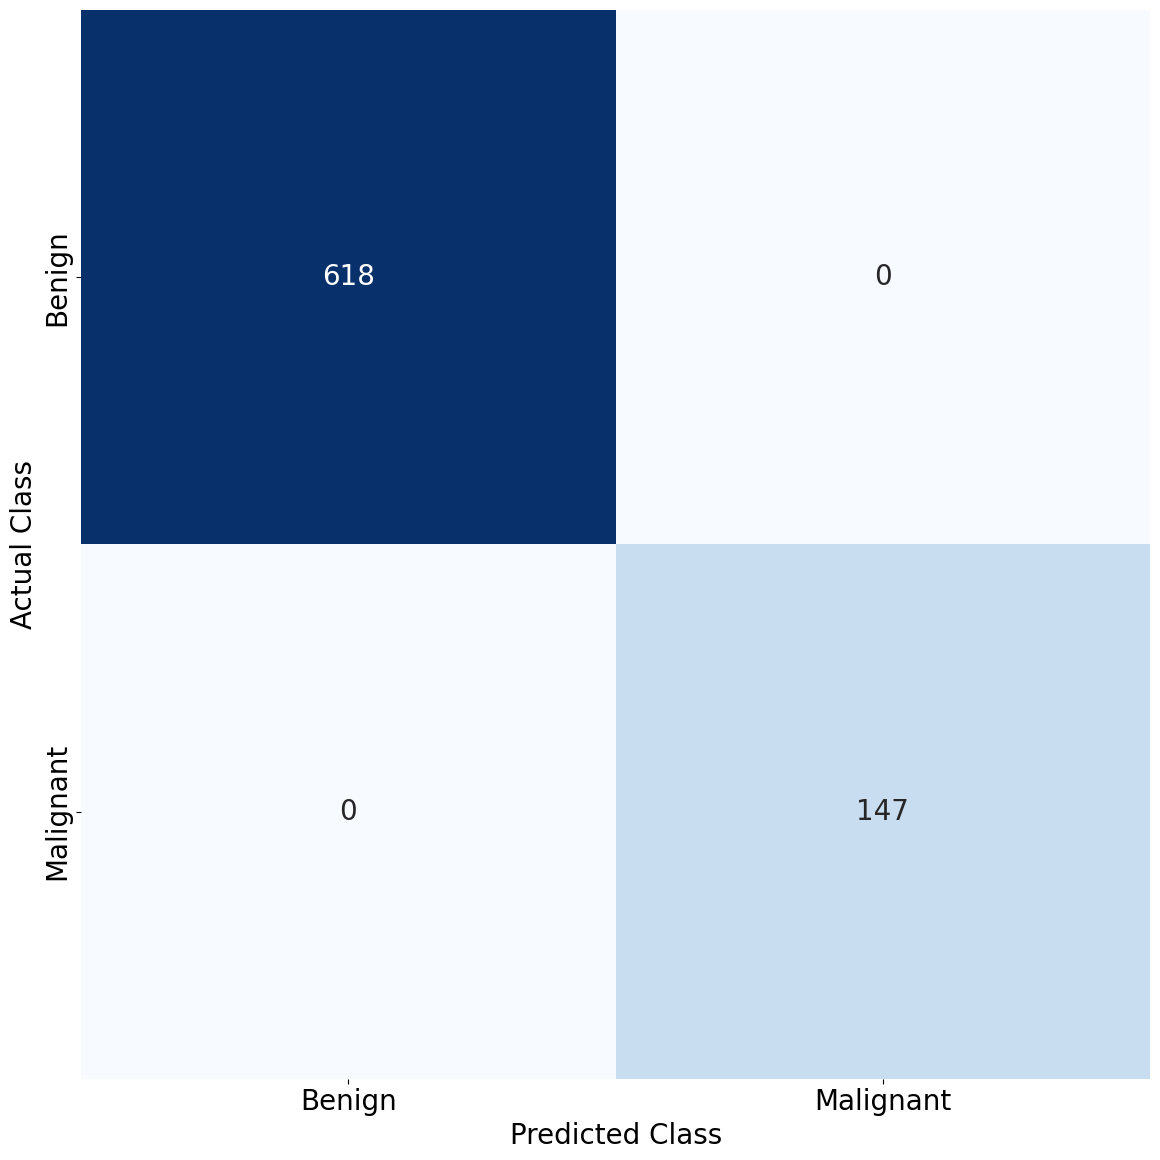

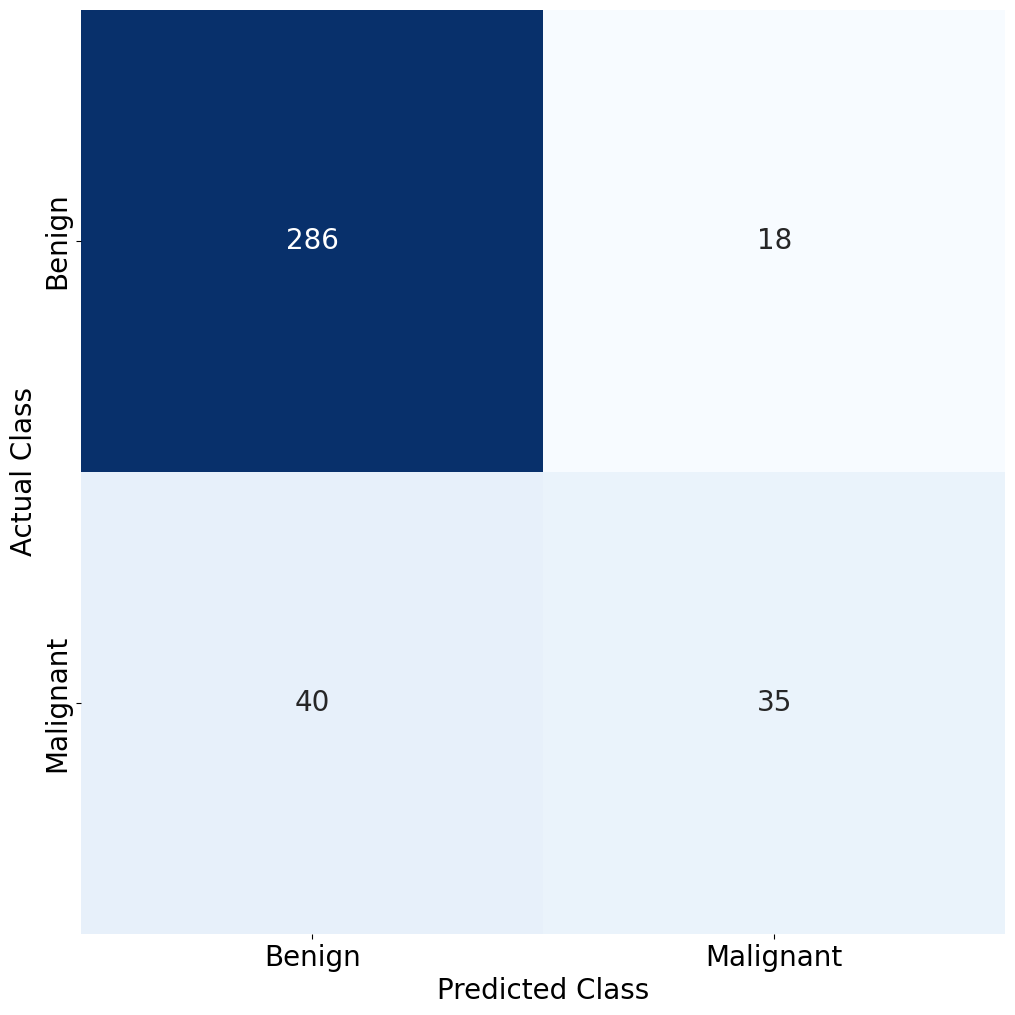

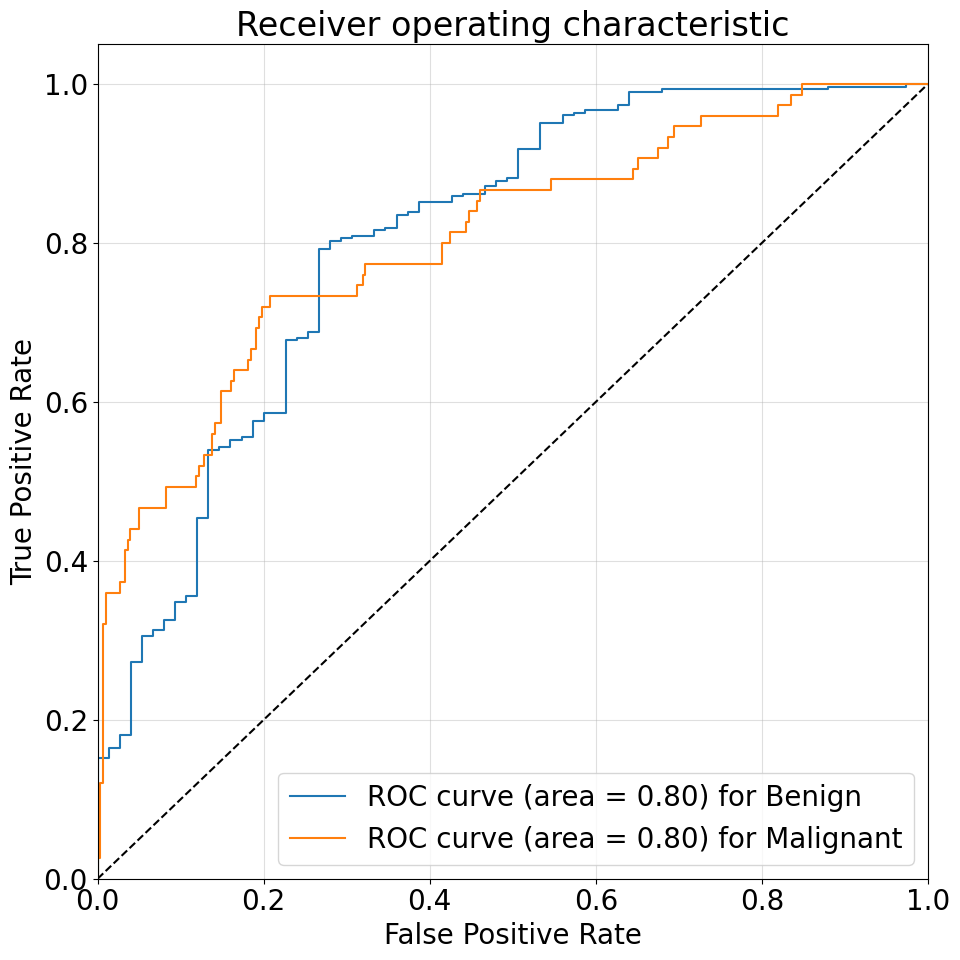

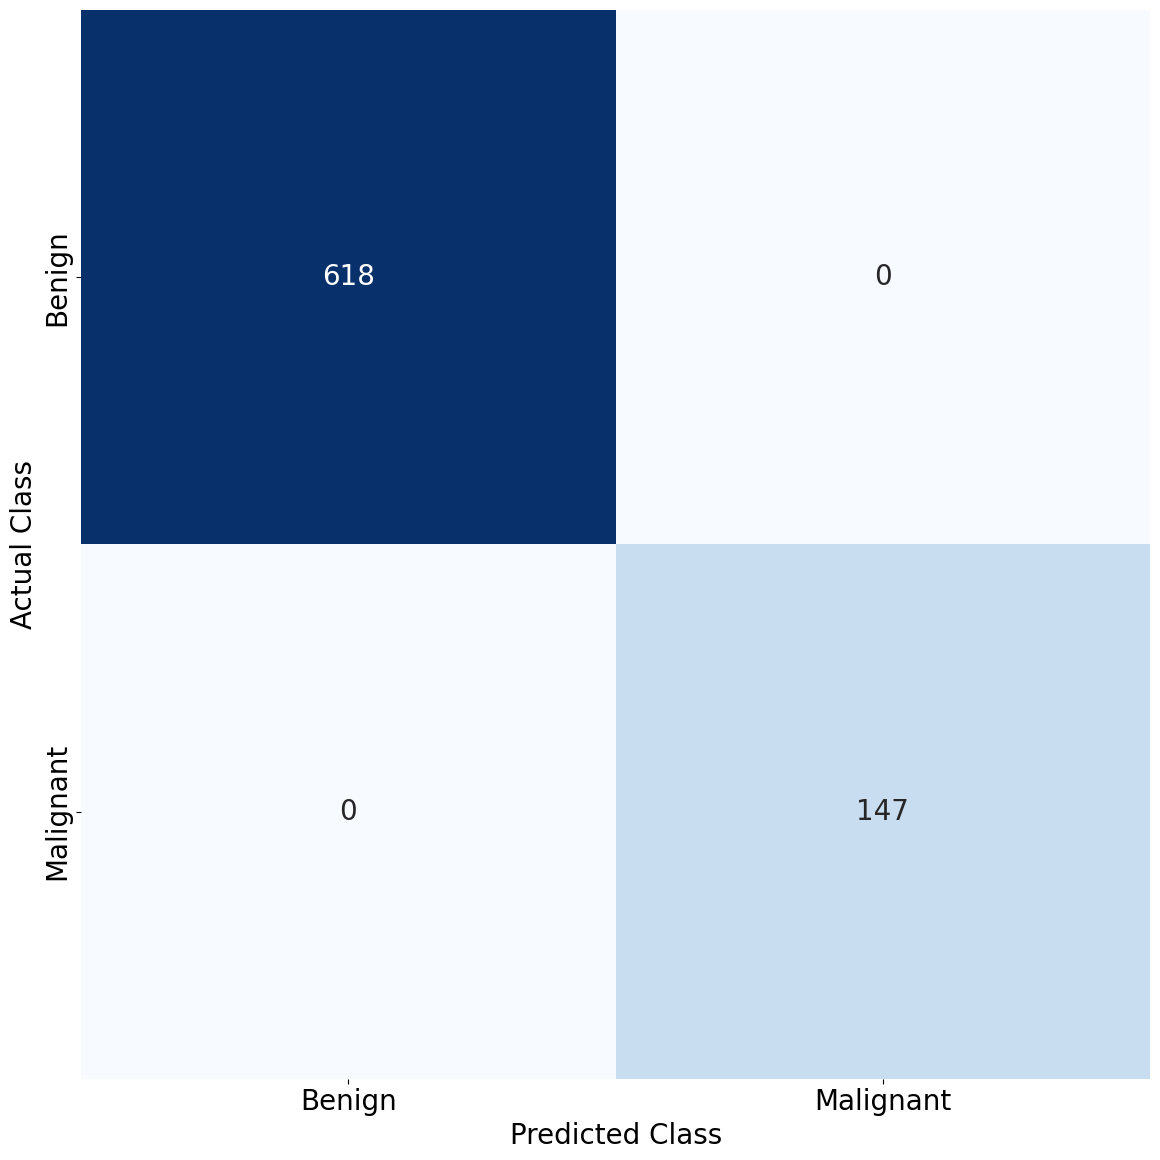

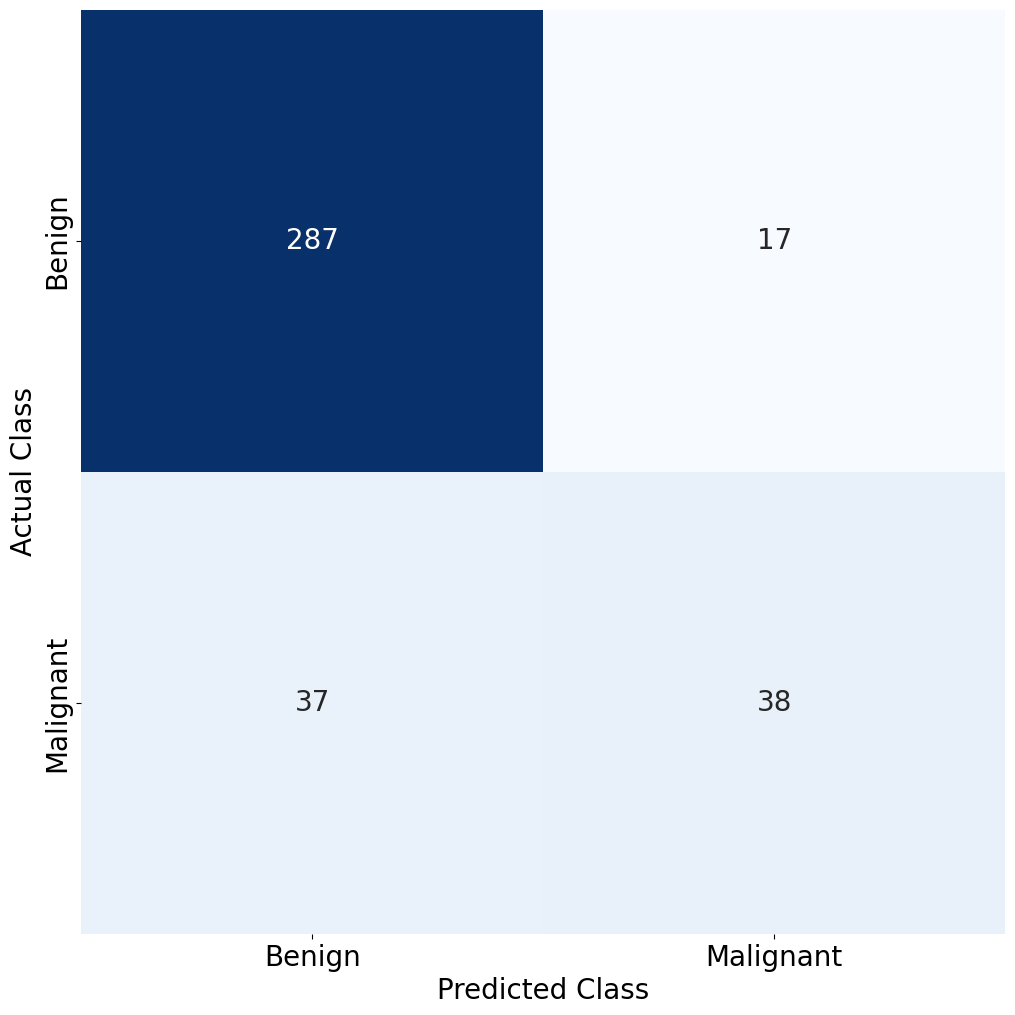

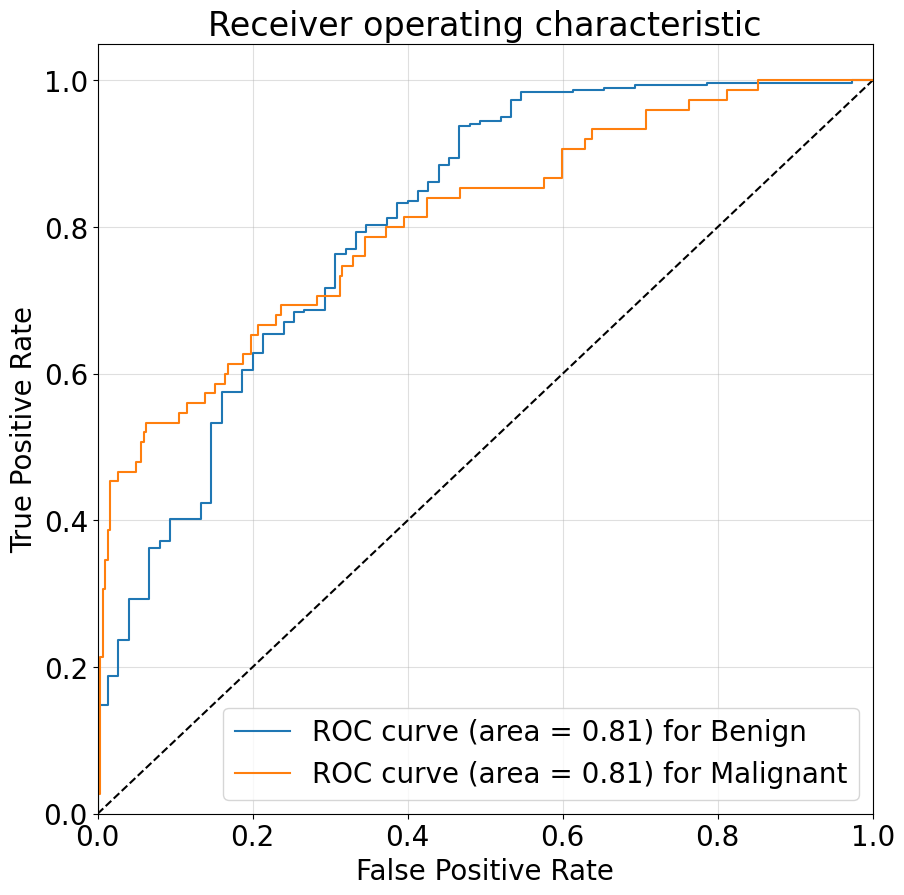

In [177]:
import os
import csv
import numpy
import time
from sklearn.model_selection import train_test_split
import pandas as pd


pd.set_option("display.precision", 4)
pd.set_option("display.float_format", lambda x: "%.4f" % x)
PROJECT_PATH = os.getcwd() 
os.chdir(PROJECT_PATH)





# Select optimizers
MuARO=True


optimizer=[MuARO]

# datasets folder
p="./"
# datasets folder
path_f = p+"datasets_features/"

# dataset features Train/test files

datasets=[["Train_ft_FC1_MobileNetV3_ISIC_2016_Rep_11_Seed_296_1619717789.4316587.pt_87.0712",
            "Test_ft_FC1_MobileNetV3_ISIC_2016_Rep_11_Seed_296_1619717789.4316587.pt_87.0712"]]

# datasets=[["Train_ft_FC1_MobileNetV3_PH2_Dataset_aug_Rep_1_Seed_68_1620318833.158458.pt_95.7143",
#           "Test_ft_FC1_MobileNetV3_PH2_Dataset_aug_Rep_1_Seed_68_1620318833.158458.pt_95.7143"]]

# datasets=[["Train_ft_FC1_MobileNetV3_HAM1000_Rep_3_Seed_769_1654596761.1335943.pt_88.8283",
#           "Test_ft_FC1_MobileNetV3_HAM1000_Rep_3_Seed_769_1654596761.1335943.pt_88.8283"]]


class_ = 'binary'#'multiclass' # binary / multiclass
samples_ratio = None # None: no reduce / other numbers such as 100: getting 1000 samples from each class


        
# Select number of repetitions for each experiment. 
# To obtain meaningful statistical results, usually 30 independent runs 
# are executed for each algorithm.
NumOfRuns=2#2

# Select general parameters for all optimizers (population size, number of iterations)
PopulationSize = 25 #50
Iterations= 10#10
CrossVal = False
CVtype = "loo" # "kfold" or "loo"


#Export results ?
Export=True


# Check if it works at least once
Flag=False

# CSV Header for for the cinvergence 
CnvgHeader1=[]
CnvgHeader2=[]


for l in range(0,Iterations):
	CnvgHeader1.append("Iter"+str(l+1))

for l in range(0,Iterations):
	CnvgHeader2.append("Iter"+str(l+1))


for j in range (0, len(datasets)):        # specfiy the number of the datasets

    #Automaticly generated file name by date and time
    File_name = f'{"_".join(datasets[j][0].split("_")[3:6])}_{class_}_{time.strftime("%Y-%m-%d-%H-%M-%S")}'
    #File_name = 'experiment'+'_'+class_+'_'+'_'.join(datasets[0].split('_')[3:5])+'_'+time.strftime("%Y-%m-%d-%H-%M-%S")
    exp_folder = os.path.join(p+"results/", File_name)
    if not os.path.isdir(exp_folder): 
        os.makedirs(exp_folder)
                
    ExportToFile= os.path.join(exp_folder, File_name + ".csv") 
    # Loggers
    Console_LOGGER, LOGGER_FILE  = getLogger(exp_folder, File_name, mode = 'print_all')

    for i in range (0, len(optimizer)):
    
        if((optimizer[i]==True)): # start experiment if an optimizer and an objective function is selected
            for k in range (0,NumOfRuns):
                
                #func_details=["costNN",-1,1]
                func_details=fitnessFUNs.getFunctionDetails(0)
                completeData_train=datasets[j][0]+".csv"
                completeData_test=datasets[j][1]+".csv"
                if CrossVal == True:
                    x=slctrCrossVal.selector(i,func_details,PopulationSize,Iterations,completeData_train, completeData_test,samples_ratio, path_f, exp_folder, LOGGER_FILE, class_, CVtype)
                else:
                    x=slctr2.selector(i,func_details,PopulationSize,Iterations,completeData_train, completeData_test,samples_ratio, path_f, exp_folder, LOGGER_FILE, class_, CVtype)
                  
                if(Export==True):
                    with open(ExportToFile, 'a',newline='\n') as out:
                        writer = csv.writer(out,delimiter=',')
                        if (Flag==False): # just one time to write the header of the CSV file
                            header= numpy.concatenate([["Optimizer",
                                                        "Dataset",
                                                        "objfname",
                                                        "Experiment",
                                                        "startTime",
                                                        "EndTime",
                                                        "ExecutionTime",
                                                        "trainAcc",
                                                        "testAcc",
                                                        "rec_train",
                                                        "prec_train",
                                                        "f1_train",
                                                        "rec_test",
                                                        "prec_test",
                                                        "f1_test",
                                                        "roc_auc_train",
                                                        "roc_auc_test",
                                                        "bestIndividual"
                                                        ],
                                                       CnvgHeader1,
                                                       CnvgHeader2])
                            writer.writerow(header)

                        a=numpy.concatenate([[x.optimizer,
                                              datasets[j][0],
                                              x.objfname,
                                              k+1,
                                              x.startTime,
                                              x.endTime,
                                              x.executionTime,
                                              x.trainAcc,
                                              x.testAcc,
                                              x.rec_train,
                                              x.prec_train,
                                              x.f1_train,
                                              x.rec_test,
                                              x.prec_test,
                                              x.f1_test,
                                              x.roc_auc_train,
                                              x.roc_auc_test,
                                              str(x.bestIndividual)
                                              ],
                                             x.convergence1,
                                             x.convergence2])
                        writer.writerow(a)
                    out.close()
                Flag=True # at least one experiment
                
if (Flag==False): # Faild to run at least one experiment
    print("No Optimizer or Cost function is selected. Check lists of available optimizers and cost functions") 
